In [48]:
%matplotlib inline
import matplotlib
matplotlib.rc('font', **{'size': 12})

import pickle
import re
import datetime
from elasticsearch import Elasticsearch, helpers
from elasticsearch.helpers import scan
import datetime as dt

import numpy as np
import pandas as pd

In [49]:
model1 = pickle.load(open('dumb_model1.pickle','rb'))
#model2 = pickle.load(open('dumb_model2.pickle','rb'))
data = pd.read_csv('transfers_2016-11-30.csv')

queue_t_pred1 = []
net_t_pred1 = []
queue_t_pred2 = []
net_t_pred2 = []

for index,row in data.iterrows():
    link = row.SRC + ' ' + row.DST + ' ' + row.ACT
    if link not in model1.keys():
        print('Link not found: ', link)
        queue_t_pred1.append(-1)
        net_t_pred1.append(-1)
    else:
        queue_t_pred1.append(model1[link][0])
        net_t_pred1.append(model1[link][1])
    if link not in model2.keys():
        print('Link not found: ', link)
        queue_t_pred2.append(-1)
        net_t_pred2.append(-1)
    else:
        queue_t_pred2.append(model2[link][0])
        net_t_pred2.append(model2[link][1])
data['Q1_PRED'] = queue_t_pred1
data['N1_PRED'] = net_t_pred1
#data['Q2_PRED'] = queue_t_pred2
#data['N2_PRED'] = net_t_pred2


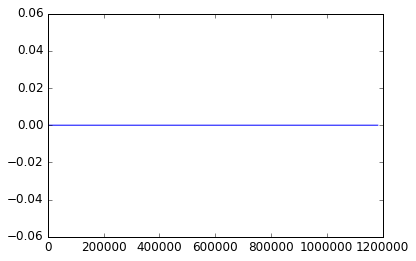

In [50]:
#plt.plot(data['N1_PRED']-data['N2_PRED'],'-')

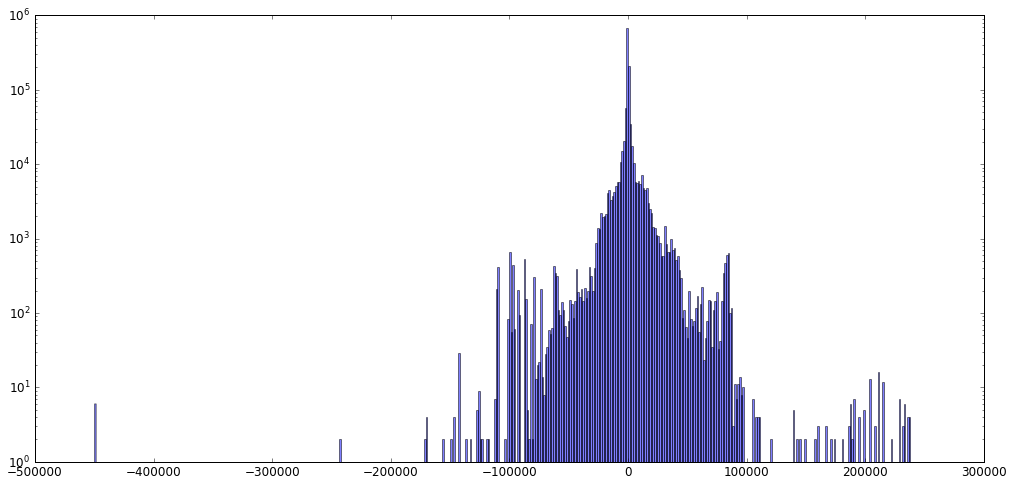

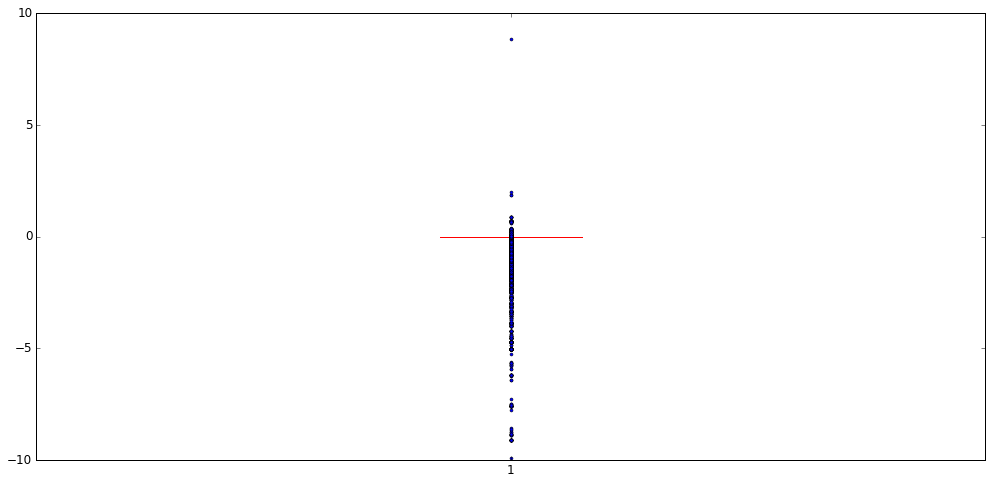

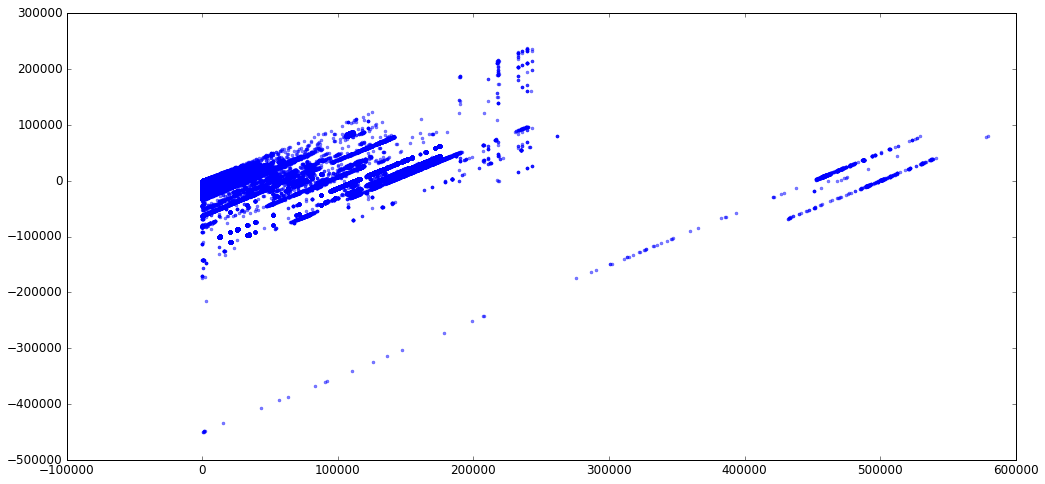

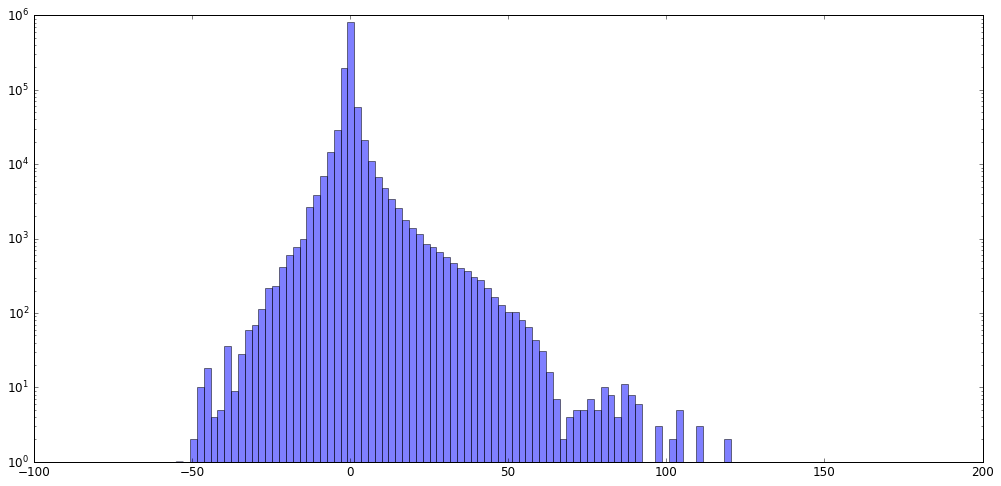

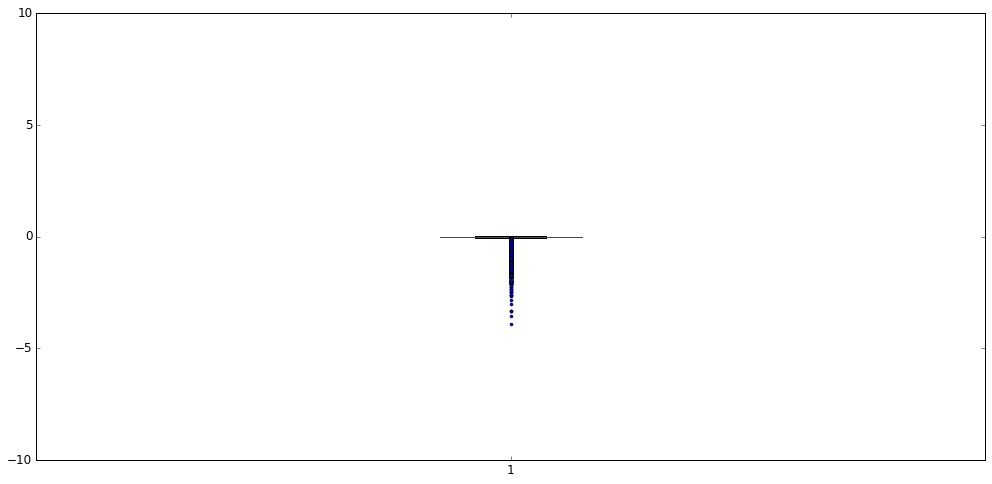

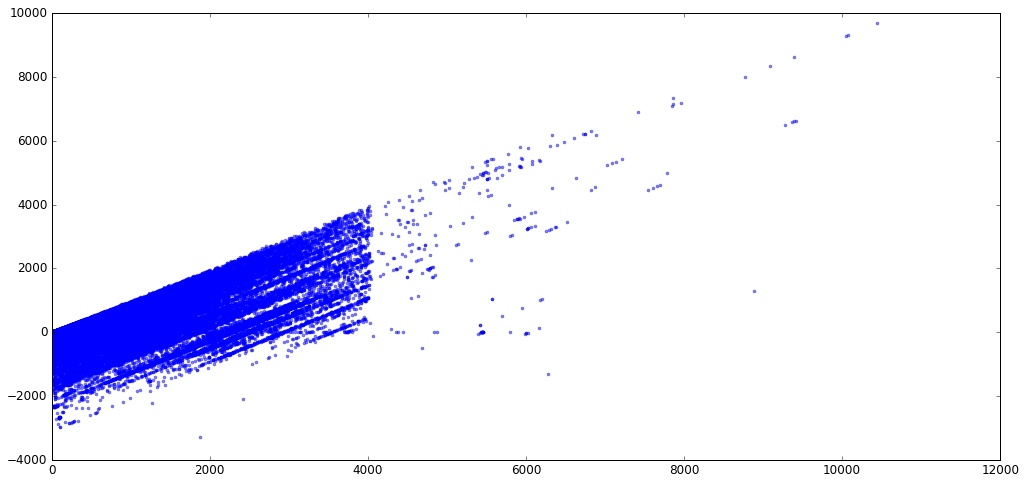

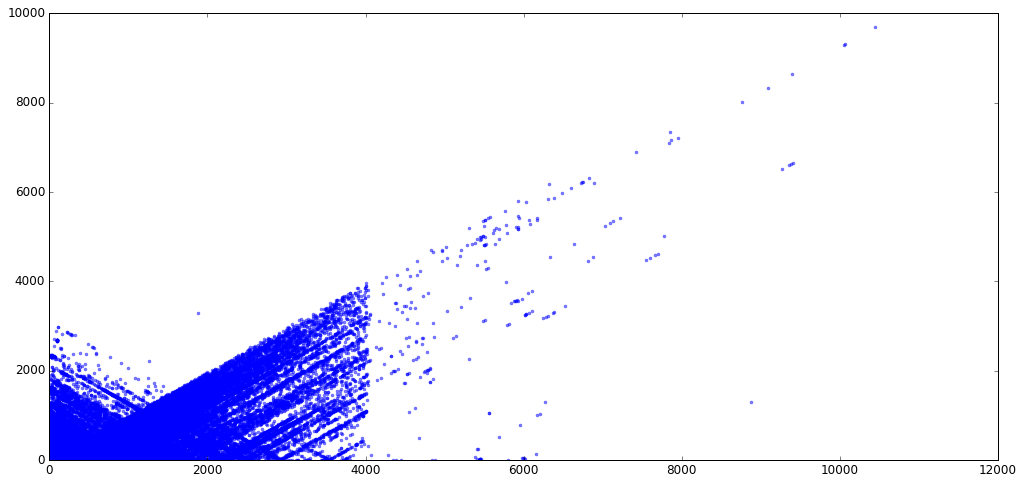

In [53]:
import matplotlib.pyplot as plt
plt.hist((data['QUEUE_T'] - data['Q1_PRED']), bins=500, alpha=0.5)
#plt.hist((data['QUEUE_T'] - data['Q2_PRED']), bins=500, alpha=0.5)
plt.yscale('log')
fig = plt.gcf()
fig.set_size_inches(17, 8)
plt.show()

plt.boxplot(((data['QUEUE_T'] - data['Q1_PRED'])/(data['QUEUE_T']+0.00000000001))/60./60,0,'.')
#plt.boxplot(((data['QUEUE_T'] - data['Q2_PRED'])/(data['QUEUE_T']+0.00000000001))/60./60,0,'.')
fig = plt.gcf()
fig.set_size_inches(17, 8)
plt.ylim((-10,10))
plt.show()

plt.plot(data['QUEUE_T'],data['QUEUE_T'] - data['Q1_PRED'],'.', alpha=0.5)
#plt.plot(data['QUEUE_T'],data['QUEUE_T'] - data['Q2_PRED'],'.', alpha=0.5)
fig = plt.gcf()
fig.set_size_inches(17, 8)
plt.show()

plt.hist((data['NET_T'] - data['N1_PRED'])/60., bins=100, alpha=0.5)
#plt.hist((data['NET_T'] - data['N2_PRED'])/60., bins=100, alpha=0.5)
plt.yscale('log')
fig = plt.gcf()
fig.set_size_inches(17, 8)
plt.show()

plt.boxplot(((data['NET_T'] - data['N1_PRED'])/(data['NET_T']+0.0000000001))/60.,0,'.')
#plt.boxplot(((data['NET_T'] - data['N2_PRED'])/(data['NET_T']+0.0000000001))/60.,0,'.')
fig = plt.gcf()
plt.ylim((-10,10))
fig.set_size_inches(17, 8)
plt.show()

plt.plot(data['NET_T'], data['NET_T'] - data['N1_PRED'], '.', alpha=0.5)
#plt.plot(data['NET_T'], data['NET_T'] - data['N2_PRED'], '.', alpha=0.5)
fig = plt.gcf()
fig.set_size_inches(17, 8)
plt.show()

plt.plot(data['NET_T'], np.abs(data['NET_T'] - data['N1_PRED']), '.', alpha=0.5)
#plt.plot(data['NET_T'], np.abs(data['NET_T'] - data['N2_PRED']), '.', alpha=0.5)
fig = plt.gcf()
fig.set_size_inches(17, 8)
plt.show()